# Lab 8 : Star Formation 

In [5]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [7]:

def StarFormationRate(L, Type, TIR=0):
    """
    Given the luminosity of a galaxy, this function returns its star formation rate (SFR). 

    Inputs
    ----------
    L : float
        Luminosity of the galaxy in erg/s.
    Type : str
        Type of luminosity ('NUV', 'FUV', 'TIR', 'Halpha').
    TIR : float, optional
        Total infrared luminosity in Lsun (default is 0).

    Returns
    -------
    SFR : float
        Star formation rate in Msun/year.
    """
    
    if Type == 'FUV':
        logCx = 43.35 # LFUV to SFR
        TIRc = 0.46 # correction factor to account for dust absorption
    elif Type == 'NUV':
        logCx = 43.17 # LNUV to SFR
        TIRc = 0.27 # correction factor for dust absorbtion
    elif Type == 'Halpha':
        logCx = 41.27
        TIRc = 0.0024
    elif Type == 'TIR':
        logCx = 43.41
        TIRc = 1
    else:
        print('Type not recognized. Expected either "FUV", "NUV", "TIR", "Halpha"')  # Error Message
    
    # correct the luminosity for dust absorption
    Lcorr = L + TIRc*TIR

    #star formation rate
    SFR = np.log10(Lcorr.value) - logCx

    return SFR

    

Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [9]:
# First need the Luminosity of the Sun in the right units
print(const.L_sun)
LsunErgS = const.L_sun.to(u.erg/u.s)
print(LsunErgS)

  Name   = Nominal solar luminosity
  Value  = 3.828e+26
  Uncertainty  = 0.0
  Unit  = W
  Reference = IAU 2015 Resolution B 3
3.828e+33 erg / s


In [11]:
#  WLM Dwarf Irregular Galaxy

NUV_WLM = 1.71e7 * LsunErgS # NED GALEX data set
TIR_WLM = 2.48e6 * LsunErgS + 3.21e5 * LsunErgS + 2.49e6* LsunErgS # NED IRAS data set
print(StarFormationRate(NUV_WLM, 'NUV', TIR_WLM))

-2.319186168309912


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [13]:

def SFRMainSequece(Mstar, z):
    """
    For a galaxy on the main sequence of star formation, this function returns the SFR for a given stellar mass in the galaxy.
    
    Inputs
    ----------
    Mstar: float, stellar mass of the galaxy in Msun
    z: float, galactic redshift

    Returns
    -------
    SFR: float, log of star formation rate in Msun/yr
    """

    # fitting params
    alpha = 0.7 - 0.13 * z
    beta = 0.38 + 1.14 * z - 0.19 * z**2

    SFR = alpha * (np.log10(Mstar) - 10.5) + beta

    return SFR

# Step 2

In [31]:
# MW at z=0
MW_mass = 7.5e10  # in units of Msun
SFR_z0 = SFRMainSequece(MW_mass, 0)
print(f"Average SFR for MW at z=0: {10**SFR_z0}")

Average SFR for MW at z=0: 4.390792203431891


In [17]:
# MW at z = 1
MW_mass_z1 = 7.5e10  # in units of Msun
SFR_z1 = SFRMainSequece(MW_mass_z1, 1)
print(f"Average SFR for MW at z=1: {10**SFR_z1}")


Average SFR for MW at z=1: 34.97719031976979


# Step 3

In [19]:
# create an array of stellar masses
stellar_masses = np.linspace(1e8, 1e12)


<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
<>:12: SyntaxWarning: invalid escape sequence '\o'
<>:13: SyntaxWarning: invalid escape sequence '\o'
C:\Users\abhiv\AppData\Local\Temp\ipykernel_14232\2796491104.py:12: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
C:\Users\abhiv\AppData\Local\Temp\ipykernel_14232\2796491104.py:13: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


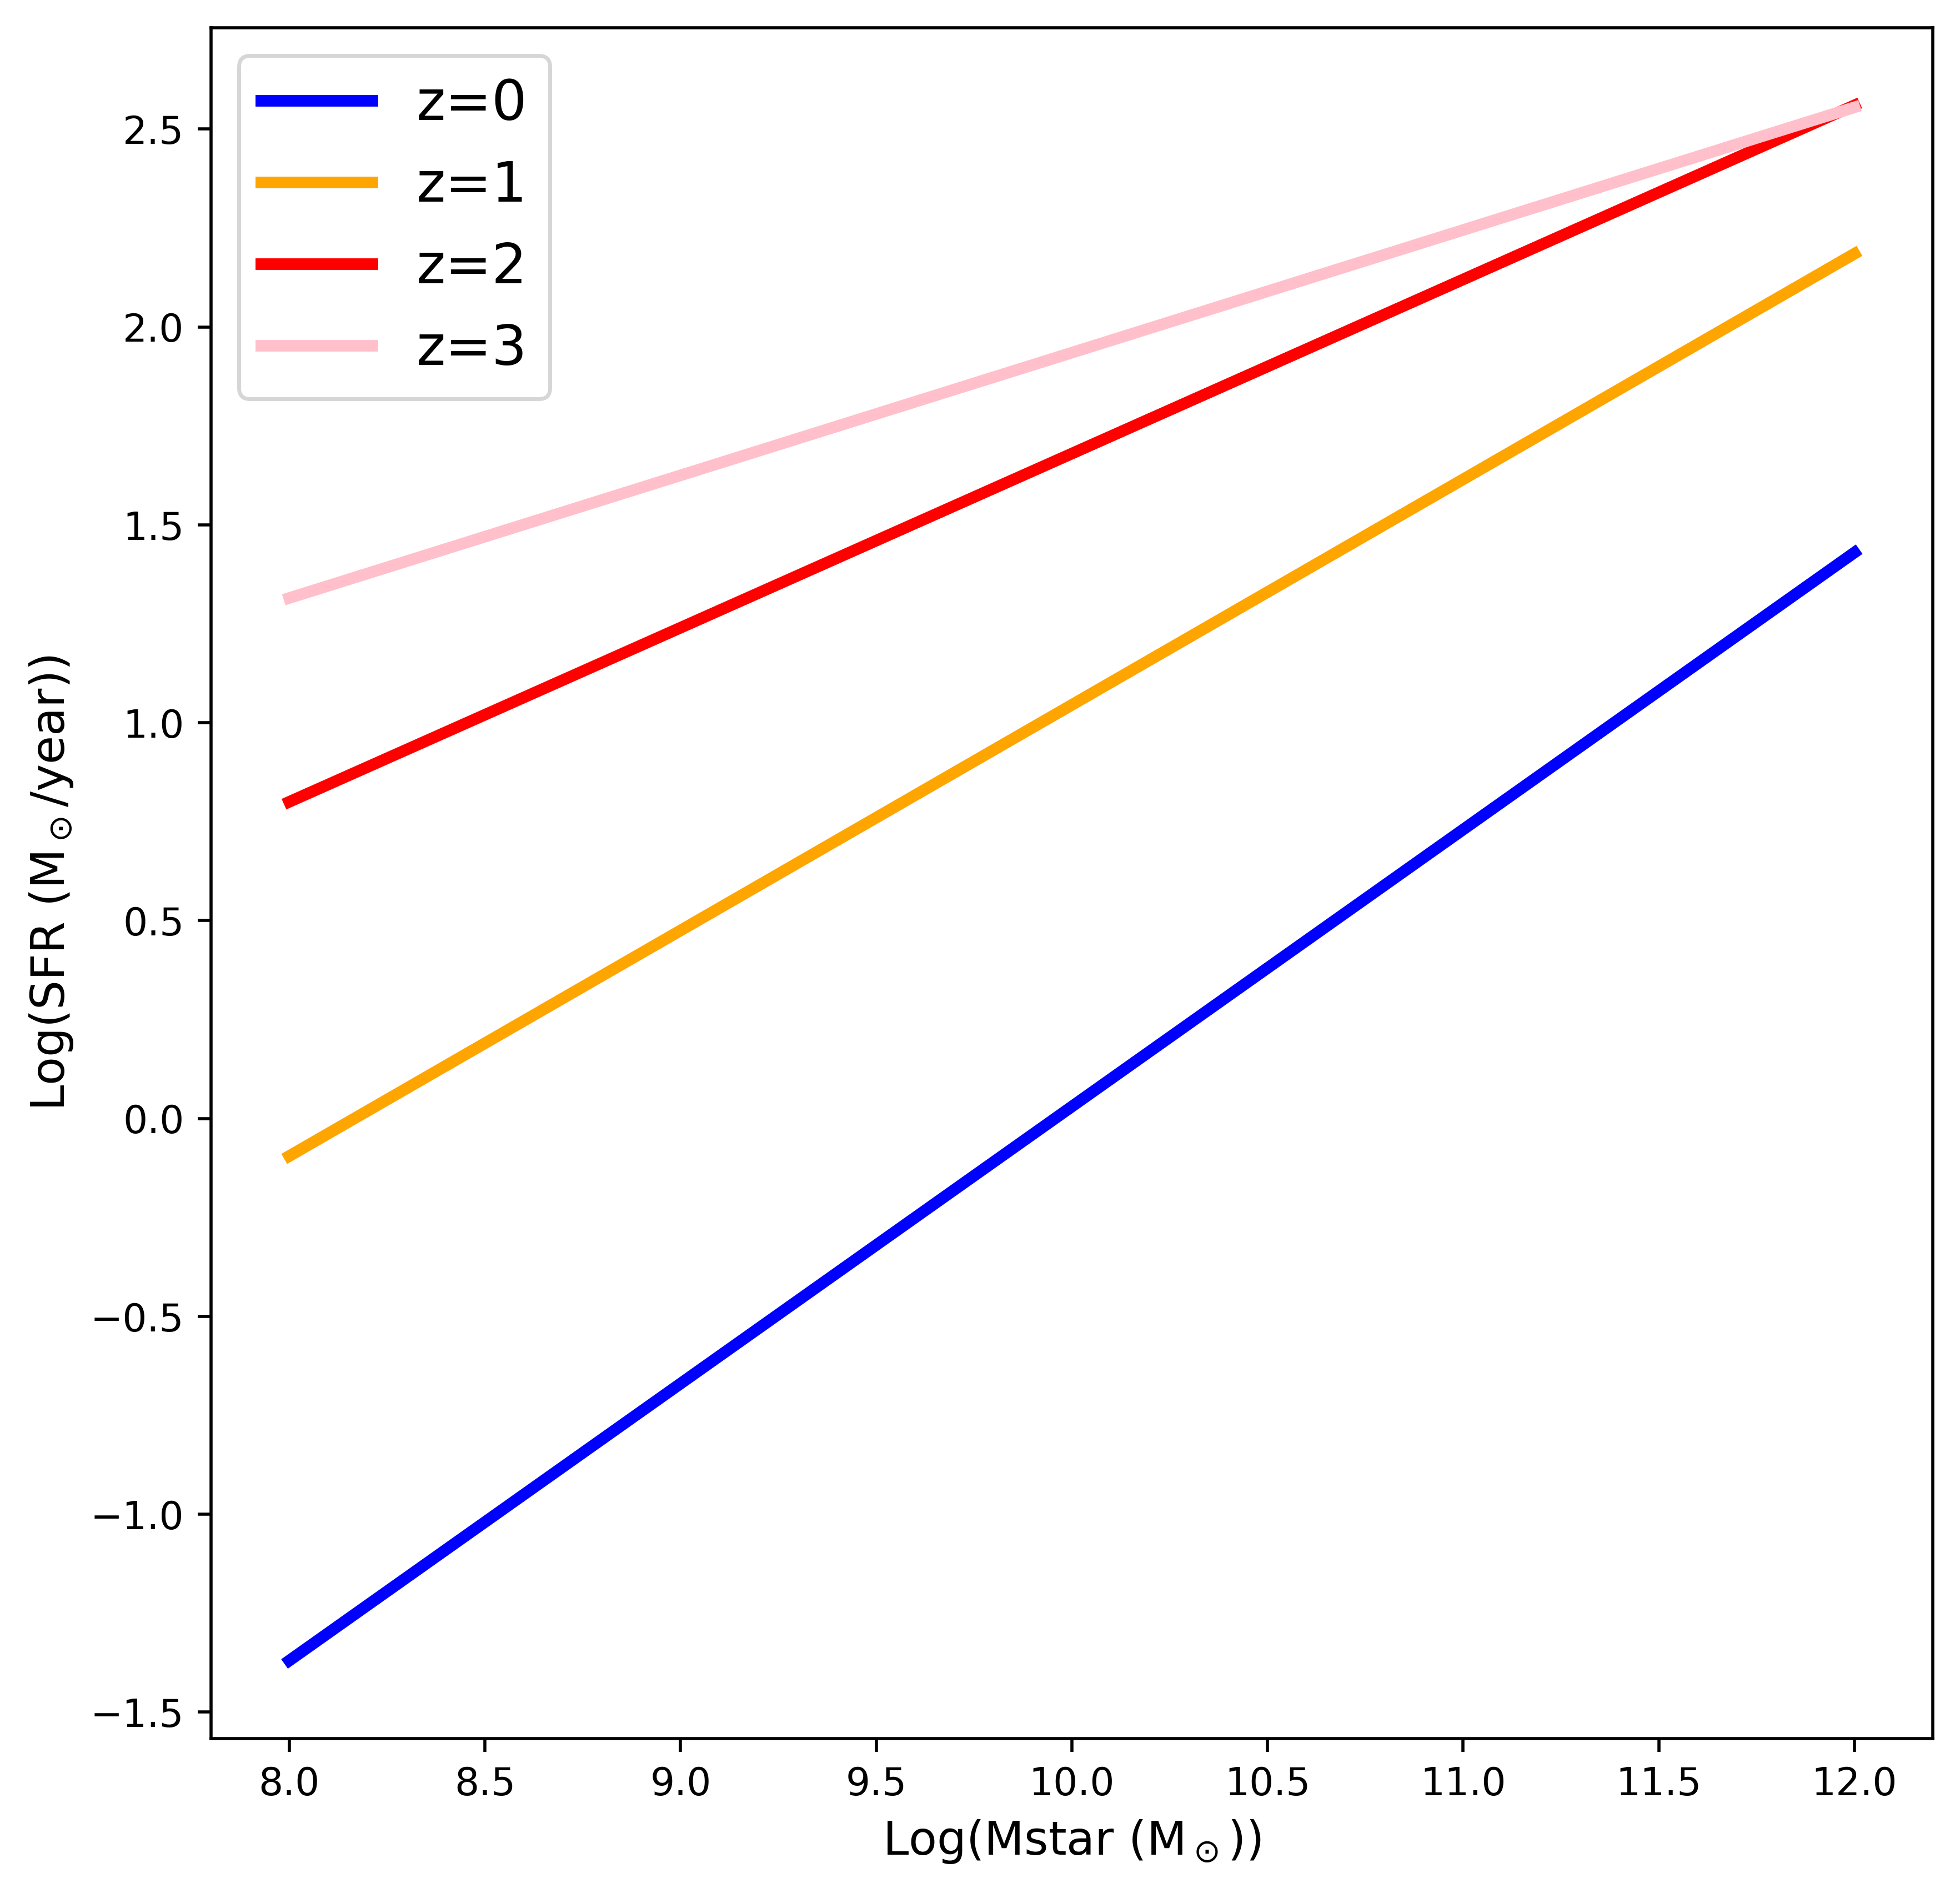

In [21]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(stellar_masses), SFRMainSequece(stellar_masses, 0), label='z=0', color='blue', lw=3)
plt.plot(np.log10(stellar_masses), SFRMainSequece(stellar_masses, 1), label='z=1', color='orange', lw=3)
plt.plot(np.log10(stellar_masses), SFRMainSequece(stellar_masses, 2), label='z=2', color='red', lw=3)
plt.plot(np.log10(stellar_masses), SFRMainSequece(stellar_masses, 3), label='z=3', color='pink', lw=3)


# Add axis labels
plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Save file
plt.savefig('Lab8_SFR_MainSequence.png')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [23]:
# normal galaxies 

SFR_normal = StarFormationRate(1e10 * LsunErgS, 'TIR')
print(f"Normal Galaxies SFR: {10**SFR_normal} Msun/year")


Normal Galaxies SFR: 1.4892648150381245 Msun/year


In [25]:
# LIRGs  

SFR_LIRG = StarFormationRate(1e11 * LsunErgS, 'TIR')
print(f"LIRG SFR: {10**SFR_LIRG} Msun/year")


LIRG SFR: 14.892648150381245 Msun/year


In [27]:
# ULIRGs

SFR_ULIRG = StarFormationRate(1e12 * LsunErgS, 'TIR')
print(f"ULIRG SFR: {10**SFR_ULIRG} Msun/year")


ULIRG SFR: 148.92648150381245 Msun/year


In [29]:
# HLIRGs

SFR_HLIRG = StarFormationRate(1e13 * LsunErgS, 'TIR')
print(f"HLIRG SFR: {10**SFR_HLIRG} Msun/year")

HLIRG SFR: 1489.2648150381244 Msun/year
